### 1. 딥러닝 기초
- 인간의 신경망을 모방해서 학습 및 예측하고 판단하는 기술
- 영상처리, 음성처리, 자연어처리, 이미지 분야 등 사용


---
- TensorFlow : Google이 만든 딥러닝 Framework
- Keras : 사용자 친화적 라이브러리(API), TF 2.x.x 이후부터는 TF 안에 내장되어 있음



In [ ]:
# 작업하고 있는 위치 변경
%cd /content/drive/MyDrive/SMHRD-DL

/content/drive/MyDrive/SMHRD-DL


In [ ]:
!pwd

/content/drive/MyDrive/SMHRD-DL


### 2. 공부 시간에 따른 학생의 수학 성적을 예측하는 회귀 모델링

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 데이터 로드

In [ ]:
data = pd.read_csv('./data/student-mat.csv', delimiter=';')
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


| 컬럼 이름       | 설명                             |
|-----------------|----------------------------------|
| school          | 학교 (GP - Gabriel Pereira, MS - Mousinho da Silveira) |
| sex             | 성별 (F - Female, M - Male)      |
| age             | 나이                             |
| address         | 주소 유형 (U - Urban, R - Rural) |
| famsize         | 가족 크기 (LE3 - 3명 이하, GT3 - 3명 초과) |
| Pstatus         | 부모 동거 상태 (T - 함께, A - 별거) |
| Medu            | 어머니 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Fedu            | 아버지 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Mjob            | 어머니 직업 (teacher, health, services, at_home, other) |
| Fjob            | 아버지 직업 (teacher, health, services, at_home, other) |
| reason          | 학교 선택 이유 (home, reputation, course, other) |
| guardian        | 보호자 (mother, father, other)  |
| traveltime      | 통학 시간 (1 - 15분 이하, 2 - 15~30분, 3 - 30분~1시간, 4 - 1시간 초과) |
| studytime       | 주간 공부 시간 (1 - 2시간 이하, 2 - 2~5시간, 3 - 5~10시간, 4 - 10시간 초과) |
| failures        | 과목 낙제 수 (n if 1<=n<3, else 4) |
| schoolsup       | 학교 추가 지원 (yes, no)        |
| famsup          | 가족 추가 지원 (yes, no)        |
| paid            | 과외 수업 참여 (yes, no)        |
| activities      | 학교 외 활동 참여 (yes, no)     |
| nursery         | 유치원 참여 여부 (yes, no)      |
| higher          | 고등교육 희망 여부 (yes, no)    |
| internet        | 가정 내 인터넷 접속 여부 (yes, no) |
| romantic        | 로맨틱 관계 여부 (yes, no)      |
| famrel          | 가족 관계의 질 (1 - 매우 나쁨, 5 - 매우 좋음) |
| freetime        | 여가 시간의 양 (1 - 매우 적음, 5 - 매우 많음) |
| goout           | 외출 빈도 (1 - 매우 적음, 5 - 매우 많음) |
| Dalc            | 평일 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| Walc            | 주말 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| health          | 현재 건강 상태 (1 - 매우 나쁨, 5 - 매우 좋음) |
| absences        | 결석 일수                        |
| G1              | 1학기 성적                       |
| G2              | 2학기 성적                       |
| G3              | 최종 성적                        |


In [ ]:
data.info()

# 결측치 X (Non-Null Count의 개수를 비교해보면 됨)
# 숫자형 column : 16개 / 문자형 column : 17개
# 학습에 사용할 studytime column이 숫자로 생겨서 전처리 하지 않고 학습 가능
# object 타입 -> 원핫 encoding 사용하여 전처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
X = data[['studytime']] # 문제데이터는 2차원으로!
print(X.shape)

y = data['G3']
print(y.shape)

(395, 1)
(395,)


#### train, testset으로 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

####  크기 확인

In [ ]:
print('훈련 데이터 :', X_train.shape, y_train.shape)
print('테스트 데이터 :', X_test.shape, y_test.shape)

훈련 데이터 : (276, 1) (276,)
테스트 데이터 : (119, 1) (119,)


### 3. 머신러닝 모델링

In [ ]:
from sklearn.linear_model import LinearRegression

#### 모델 객체 생성(lr_model)

In [ ]:
lr_model = LinearRegression()

#### 학습

In [ ]:
lr_model.fit(X_train, y_train)

LinearRegression()

#### 평가

In [ ]:
lr_model.score(X_test, y_test) # R^2 score

-0.006920651921547227

##### R^2 Score
- 0~1의 값을 가지고, 1에 가까울 수록 데이터를 잘 이해할 수 있다는 의미
- 음수 값이 나오면 데이터를 잘 이해하지 못했다는 의미

### 4. 머신러닝(sklearn) vs 딥러닝(TensorFlow) 모델링 비교
- 머신러닝
  - 모델 초기화(생성) -> 학습 -> 예측&평가
  - 다양한 알고리즘(모델)들이 이미 구현된 클래스로 제공
  - 완제품 로봇에 도색(Hyper Parameter)하는 느낌
  - 누가 사용하든 비슷한 결과값

- 딥러닝
  - 모델 설계(모델을 직접 구성) -> 학습 -> 예측&평가
  - 레고로 만드는 조립식 로봇(만들고 싶은 모양대로 만들 수 있음)
  - 단순한 구조(MLP) ~ 복잡한 구조(CNN, RNN 등)까지 다양한 모델을 설계해볼 수 있음

### 딥러닝 모델링 실습

#### 용어 설명
- Sequential : 뼈대, 층(layer)을 순차적으롤 쌓아 올리는 단순한 형태의 모델 구조
- InputLayer : 입력층
- Dense(완전연결층)
  - 신경망의 가장 기본적이고 널ㄹ리 사용되는 레이어 중 하나
  - 모든 뉴련들이 이전 층과 모두 연결되어 있는 층

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

In [ ]:
X_train.iloc[0].shape # 특성이 1개인 1차원 데이터

(1,)

#### 1. 모델 설계

##### 1-1. 뼈대 설계

In [ ]:
model = Sequential()

##### 1-2. 입력층 설계 -> 입력층의 모양을 결정

In [ ]:
model.add(InputLayer(shape=(1,)))

##### 1-3. 은닉층 설계 -> 연산 담당
- units(뉴련)의 개수 -> 정답 X
- 은닉층을 몇 겹으로 할 지에도 정답 X

In [ ]:
model.add(Dense(units = 64, activation = 'sigmoid'))
model.add(Dense(units = 128, activation = 'sigmoid'))
model.add(Dense(units = 64, activation = 'sigmoid'))
model.add(Dense(units = 32, activation = 'sigmoid'))

##### 1-4. 출력층
- 출력 모양을 결정
- 기본값은 Linear(항등 함수)

In [ ]:
model.add(Dense(units = 1))

#### 2. 학습방법 설정

In [ ]:
model.compile(
    loss = 'mean_squared_error', # 모델의 오차(잘못된 정도)를 측정하는 손실함수 설정
    optimizer = 'SGD', # 최적화 함수(경사하강법 종류)
    metrics = ['mse']  # 평가지표
)

#### 3. 학습

In [ ]:
h = model.fit(X_train,
              y_train,
              validation_split = 0.2,
              epochs = 100
              )

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - loss: 69.6837 - mse: 69.6837 - val_loss: 22.9187 - val_mse: 22.9187
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.5797 - mse: 20.5797 - val_loss: 21.0546 - val_mse: 21.0546
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 20.1970 - mse: 20.1970 - val_loss: 20.4642 - val_mse: 20.4642
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.0664 - mse: 22.0664 - val_loss: 21.1617 - val_mse: 21.1617
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19.0830 - mse: 19.0830 - val_loss: 20.6671 - val_mse: 20.6671
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.2080 - mse: 21.2080 - val_loss: 20.6418 - val_mse: 20.6418
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.2821 - mse: 22.2821 - val_loss: 20.6891 - val_mse: 20.6891
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.2770 - mse: 18.2770 - val_loss: 22.1590 - val_mse: 22.1590
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s

#### 4. 예측

In [ ]:
model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


array([[10.267124],
       [10.274753],
       [10.267124],
       [10.274753],
       [10.274753],
       [10.267124],
       [10.267124],
       [10.274753],
       [10.267124],
       [10.274753],
       [10.274753],
       [10.274753],
       [10.267124],
       [10.274753],
       [10.281831],
       [10.267124],
       [10.281831],
       [10.28821 ],
       [10.274753],
       [10.281831],
       [10.267124],
       [10.267124],
       [10.274753],
       [10.274753],
       [10.281831],
       [10.267124],
       [10.274753],
       [10.274753],
       [10.274753],
       [10.28821 ],
       [10.267124],
       [10.267124],
       [10.274753],
       [10.274753],
       [10.267124],
       [10.274753],
       [10.281831],
       [10.281831],
       [10.281831],
       [10.274753],
       [10.267124],
       [10.28821 ],
       [10.274753],
       [10.274753],
       [10.281831],
       [10.274753],
       [10.28821 ],
       [10.267124],
       [10.274753],
       [10.274753],


#### 5. 평가

In [ ]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 22.4174 - mse: 22.4174


[21.60511589050293, 21.60511589050293]

#### 6. 모델의 복잡도 곡선 시각화

In [ ]:
# history 객체 : 모델의 학습 결과 정보를 담아놓는 객체
h.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

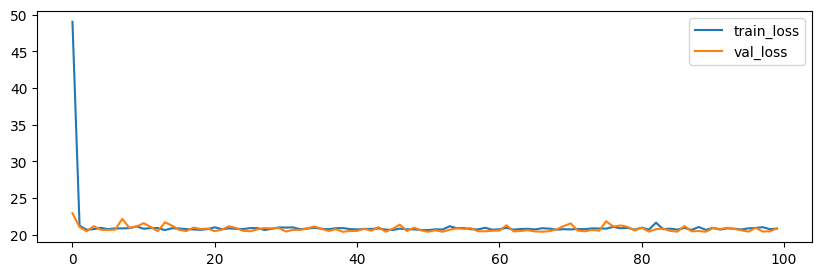

In [ ]:
plt.figure(figsize = (10, 3))
plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

# 모델의 복잡도 곡선을 통해서, 모델의 과대/과소/일반화 인지 판단 가능
# 1번째 epoch가 오차값이 가장 높았고, 이후로는 큰 차이가 없이 오차값이 유지됨
# loss 값이 20 정도로 계속 유지되는 이유 -> Feature가 1개라서 아닐까? 라고 예측 가능

### Feature 4개 선택
- studytime(공부 시간)
- traveltime(통학 시간)
- freetime(여가 시간)
- health(건강 상태)

#### 1. 데이터셋 구성

In [ ]:
X = data[['studytime', 'traveltime', 'freetime', 'health', 'Dalc', 'Walc']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [ ]:
X_train.iloc[0].shape

(6,)

In [ ]:
new_model = Sequential()

In [ ]:
new_model.add(InputLayer(shape=(6,)))

In [ ]:
new_model.add(Dense(units = 64, activation = 'sigmoid'))
new_model.add(Dense(units = 128, activation = 'sigmoid'))
new_model.add(Dense(units = 64, activation = 'sigmoid'))
new_model.add(Dense(units = 32, activation = 'sigmoid'))

In [ ]:
new_model.add(Dense(units = 1))

In [ ]:
new_model.compile(
    loss = 'mean_squared_error', # 모델의 오차(잘못된 정도)를 측정하는 손실함수 설정
    optimizer = 'SGD', # 최적화 함수(경사하강법 종류)
    metrics = ['mse']  # 평가지표
)

In [ ]:
h = new_model.fit(X_train,
                  y_train,
                  validation_split = 0.2,
                  epochs = 100
                 )

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - loss: 81.0451 - mse: 81.0451 - val_loss: 21.5856 - val_mse: 21.5856
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.7296 - mse: 21.7296 - val_loss: 21.1179 - val_mse: 21.1179
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.7261 - mse: 19.7261 - val_loss: 20.7743 - val_mse: 20.7743
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.8941 - mse: 20.8941 - val_loss: 20.8821 - val_mse: 20.8821
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.7135 - mse: 19.7135 - val_loss: 21.4876 - val_mse: 21.4876
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.6515 - mse: 21.6515 - val_loss: 21.2992 - val_mse: 21.2992
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21.0159 - mse: 21.0159 - val_loss: 20.5783 - val_mse: 20.5783
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.0333 - mse: 20.0333 - val_loss: 20.5622 - val_mse: 20.5622
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
new_model.predict(X_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


array([[10.000648 ],
       [10.003777 ],
       [ 9.997831 ],
       [10.002128 ],
       [10.022575 ],
       [10.01679  ],
       [ 9.988531 ],
       [10.022108 ],
       [ 9.999686 ],
       [ 9.995824 ],
       [10.011869 ],
       [10.01521  ],
       [ 9.996223 ],
       [ 9.998583 ],
       [10.009678 ],
       [ 9.994931 ],
       [10.015023 ],
       [10.007254 ],
       [10.012052 ],
       [10.001457 ],
       [10.006821 ],
       [10.01701  ],
       [10.010832 ],
       [10.021446 ],
       [10.010557 ],
       [10.021123 ],
       [10.000742 ],
       [ 9.9973755],
       [ 9.998396 ],
       [10.007904 ],
       [ 9.996764 ],
       [10.001403 ],
       [10.015173 ],
       [10.024086 ],
       [10.008951 ],
       [ 9.996195 ],
       [10.007901 ],
       [10.003205 ],
       [10.0102625],
       [10.011869 ],
       [10.018422 ],
       [10.018408 ],
       [10.019907 ],
       [10.012052 ],
       [10.007702 ],
       [10.004921 ],
       [10.0149975],
       [10.00

In [ ]:
new_model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 22.4632 - mse: 22.4632


[21.64443016052246, 21.64443016052246]

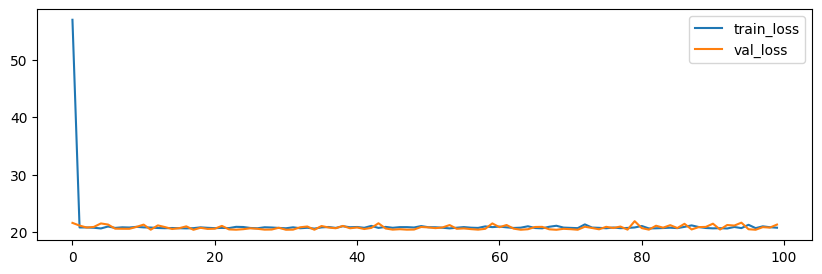

In [ ]:
plt.figure(figsize = (10, 3))
plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()